In [1]:
#detect gender & age
import cv2
import math
import argparse
import json

def highlightFace(net, frame, conf_threshold=0.7):
    frameOpencvDnn=frame.copy()
    frameHeight=frameOpencvDnn.shape[0]
    frameWidth=frameOpencvDnn.shape[1]
    blob=cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections=net.forward()
    faceBoxes=[]
    for i in range(detections.shape[2]):
        confidence=detections[0,0,i,2]
        if confidence>conf_threshold:
            x1=int(detections[0,0,i,3]*frameWidth)
            y1=int(detections[0,0,i,4]*frameHeight)
            x2=int(detections[0,0,i,5]*frameWidth)
            y2=int(detections[0,0,i,6]*frameHeight)
            faceBoxes.append([x1,y1,x2,y2])
            cv2.rectangle(frameOpencvDnn, (x1,y1), (x2,y2), (0,255,0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn,faceBoxes



def detectGA(image):
    faceProto="opencv_face_detector.pbtxt"
    faceModel="opencv_face_detector_uint8.pb"
    ageProto="age_deploy.prototxt"
    ageModel="age_net.caffemodel"
    genderProto="gender_deploy.prototxt"
    genderModel="gender_net.caffemodel"

    MODEL_MEAN_VALUES=(78.4263377603, 87.7689143744, 114.895847746)
    ageList=['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
    genderList=['Male','Female']

    faceNet=cv2.dnn.readNet(faceModel,faceProto)
    ageNet=cv2.dnn.readNet(ageModel,ageProto)
    genderNet=cv2.dnn.readNet(genderModel,genderProto)

    video=cv2.VideoCapture(image if image else 0)
    padding=20
    while cv2.waitKey(1)<0 :
        hasFrame,frame=video.read()
        if not hasFrame:
            cv2.waitKey()
            break
    
        resultImg,faceBoxes=highlightFace(faceNet,frame)
        if not faceBoxes:
            return "Unknow","Unknow"

        for faceBox in faceBoxes:
            face=frame[max(0,faceBox[1]-padding):
                       min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding)
                       :min(faceBox[2]+padding, frame.shape[1]-1)]

            blob=cv2.dnn.blobFromImage(face, 1.0, (227,227), MODEL_MEAN_VALUES, swapRB=False)
            genderNet.setInput(blob)
            genderPreds=genderNet.forward()
            gender=genderList[genderPreds[0].argmax()]
            #print(f'Gender: {gender}')

            ageNet.setInput(blob)
            agePreds=ageNet.forward()
            age=ageList[agePreds[0].argmax()]
            #print(f'Age: {age[1:-1]} years')
            return gender,age

In [2]:
with open('/Users/yangtang/Desktop/our_R/our_week5_reliability.json') as f:
    data = json.load(f, strict=False)

In [3]:
print(len(data))
for i in range(len(data)):
    url=data[i]['user']['profile_image_url']
    try:
        result = detectGA(url)
        data[i]['gender']=result[0]
        data[i]['Age']=result[1]
    except:
        data[i]['gender']='Unknow'
        data[i]['Age']='Unknow'
        pass
    
# ageList=['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
# genderList=['Male','Female']
with open('our_week5_reliability_GAC.json', 'w') as outfile:
    json.dump(data, outfile)

12025
2500
5000
7500
7500


In [15]:
# ageList=['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
# genderList=['Male','Female']
# with open('our_week5_reliability_GAC.json', 'w') as outfile:
#     json.dump(data, outfile)

Text(0, 0.5, 'Tweet Number')

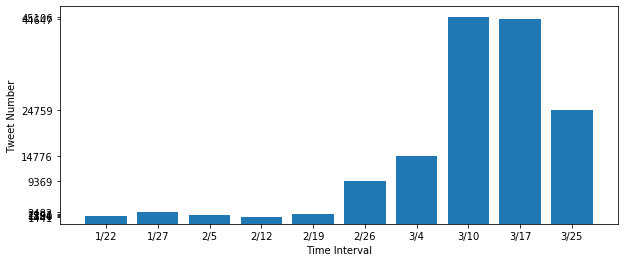

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
probability = [1790,2482,1884,1441,2191,9369,14776,45106,44647,24759]
names = ['1/22', '1/27','2/5', '2/12', '2/19', '2/26', '3/4', '3/10', '3/17', '3/25'] 
plt.bar(names, probability)
plt.xticks(names)
plt.yticks(probability) 
plt.xlabel('Time Interval')
plt.ylabel('Tweet Number')